In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HRDataset.csv')
df.dropna(thresh=2,inplace=True)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [3]:
df1 = pd.crosstab(df['ManagerID'],df['PerformanceScore'])
df1['score'] = (df1['Exceeds']*3 + df1['Fully Meets'] *2 + df1['Needs Improvement'] * 1 + df1['PIP'] *0)/(df1['Exceeds']+ df1['Fully Meets']+ df1['Needs Improvement']+ df1['PIP'])
#każdemu 'PerformanceScore' przypisuję wartość liczbową, na podstawie której obliczam średni score dla managera
df1

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,score
ManagerID,,,,,
1.0,0,6,0,0,2.000000
2.0,4,13,2,0,2.105263
3.0,0,1,0,0,2.000000
4.0,2,15,0,0,2.117647
5.0,2,4,1,0,2.142857
6.0,1,3,0,0,2.250000
7.0,0,13,0,1,1.857143
9.0,0,2,0,0,2.000000
10.0,2,6,1,0,2.111111


<Axes: xlabel='ManagerID', ylabel='score'>

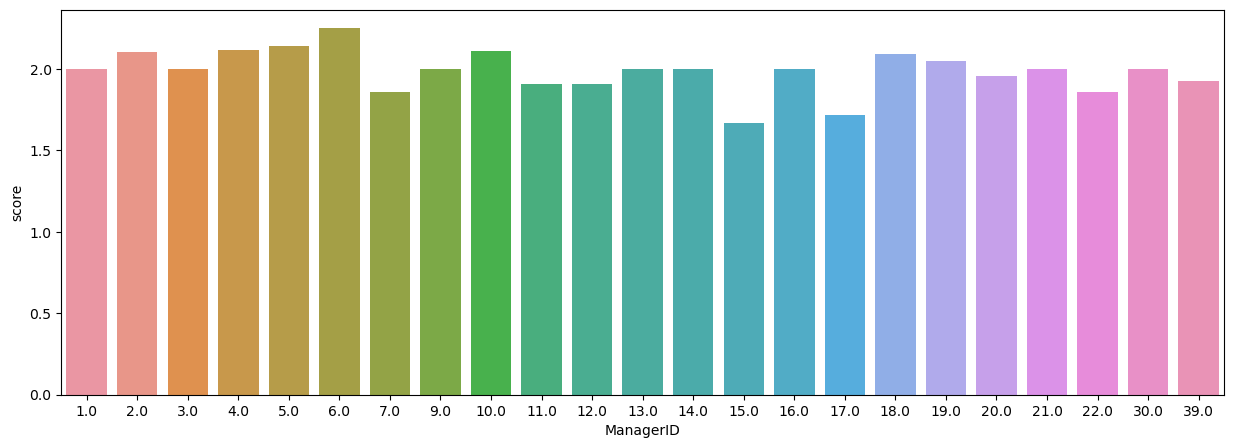

In [4]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.index,y='score',data=df1)

Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [5]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'D')/365

In [6]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [7]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [11]:
df2=df[['RecruitmentSource','Seniority']].sort_values(by='Seniority',ascending=False)
df2 

,RecruitmentSource,Seniority
31,Billboard,13.723288
128,Search Engine - Google Bing Yahoo,11.901370
133,Billboard,11.728767
0,Diversity Job Fair,10.923288
299,Other,10.731507
...,...,...
137,Word of Mouth,0.021918
138,Diversity Job Fair,0.021918
42,Employee Referral,0.016438
96,Pay Per Click,0.005479


In [12]:
df3 = df2[df2['Seniority']>df.Seniority.quantile(0.75)]
df3.pivot_table(values=['Seniority'],index='RecruitmentSource',aggfunc='count').sort_values(by='Seniority',ascending=False)

,Seniority
RecruitmentSource,
Diversity Job Fair,8
Billboard,7
Search Engine - Google Bing Yahoo,7
MBTA ads,7
Monster.com,7
Other,5
Pay Per Click - Google,5
Website Banner Ads,4
Professional Society,4


Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

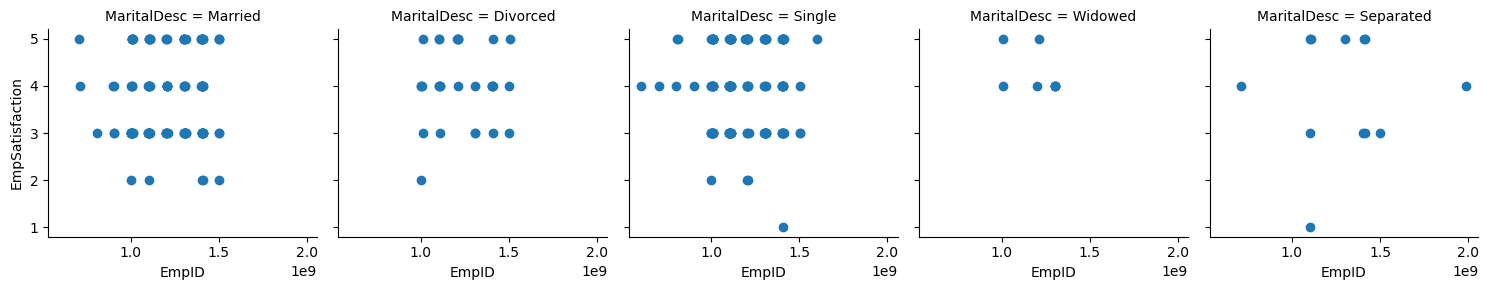

In [13]:
g = sns.FacetGrid(data=df,col='MaritalDesc')
g.map(plt.scatter,'EmpID','EmpSatisfaction')

Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [14]:
df4 = df[df['Termd']==0]

def count_age(row):
    if pd.isnull(row['DOB']):
        pass
    else:
        end_date = dt.datetime(2019,9,27)
        birth_date = row['DOB']
        age = (end_date - row['DOB'])/np.timedelta64(1,'D')/365
        if age > 0: 
            return age
        else:
            pass
            #Niektóre daty urodzenia są z przyszłości

In [15]:
df4['Age'] = df4.apply(lambda row: count_age(row),axis=1)
df4

C:\Users\Sławek\AppData\Local\Temp\ipykernel_24360\1673486918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Age'] = df4.apply(lambda row: count_age(row),axis=1)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288,31.863014
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027,35.443836
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260,33.093151
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959,31.378082
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,5.112329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,4.882192,NaN
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192,33.452055
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0,3.243836,36.654795
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,4.882192,NaN


C:\Users\Sławek\AppData\Local\Temp\ipykernel_24360\1884170448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_values)
E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

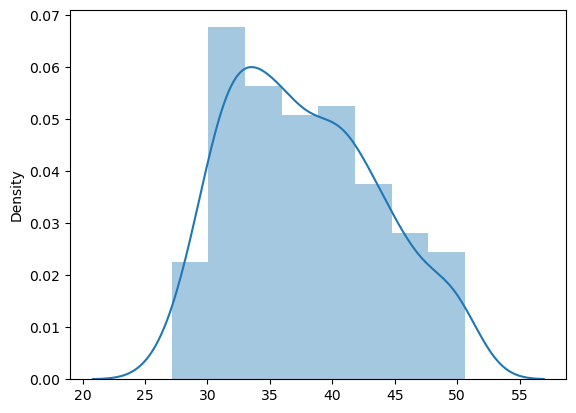

In [19]:
age_values = df4.loc[df4['Age'].notnull(), 'Age'].values
sns.distplot(age_values)

Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


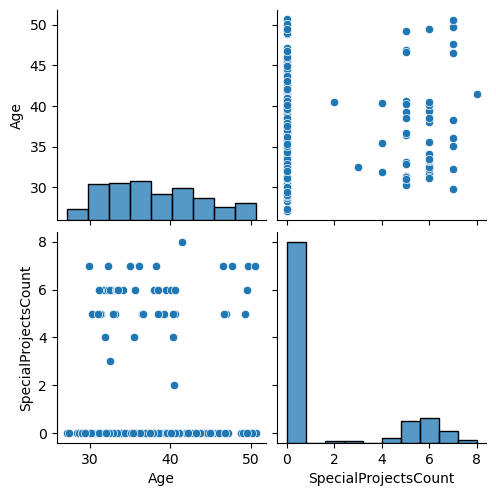

In [26]:
sns.pairplot(df4[['Age', 'SpecialProjectsCount',]])
plt.show()

ValueError: No variables found for grid columns.